<a href="https://colab.research.google.com/github/nafisenik/DataMinig_pySpark/blob/main/pySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q1

In [1]:
! pip install -q pyspark

In [2]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
! tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [4]:
! pip install -q findspark


In [5]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

In [6]:
import pyspark as py
print(py.__version__)

3.2.1


### Import Libraries

In [6]:
import random
import statistics
import time
import numpy as np
from operator import add
import matplotlib.pyplot as plt
import math
from pyspark.sql import SparkSession
import pandas as pd
import pyspark.sql.functions as F
import re
from hazm import *
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf
from pyspark.sql.functions import col
from hazm import sent_tokenize, word_tokenize
from hazm import stopwords_list
from hazm import Stemmer, Lemmatizer

### Q2---> (1)

In [8]:
def MC_pi_estimator(iteration):
  circle_point = 0
  total_point = 0
  p_list =[]
  hit = 0
  start_time = time.time()
  for i in range(iteration):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)   
    if x**2 + y**2 < 1:
      circle_point += 1
    total_point += 1
    pi_num = 4.0 * circle_point / total_point
    p_list.append(pi_num)
  end = time.time()
  t = end - start_time
  return p_list, t, pi_num

### Calculate Mean and Variance

In [9]:
ITERATION = 1000000
pi_list ,time_ex, pi_est = MC_pi_estimator(ITERATION)
pi_mean = statistics.mean(pi_list)
pi_variance = statistics.variance(pi_list)
print(f'Mean of P estimate: {pi_mean}')
print(f'Variance of P estimate: {pi_variance}')
print(f'Time of P estimate: {time_ex}')

Mean of P estimate: 3.142111325572187
Variance of P estimate: 4.0432427012569295e-05
Time of P estimate: 1.5548861026763916


### Q2 ----> (3)-(4)-(5)

In [10]:
def is_inside(p):
  x, y = random.uniform(-1, 1), random.uniform(-1, 1)
  return x**2 + y**2 < 1 

### Compare Time and Pi estimate of 2 methods

--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 100
Pi = : 3.24
Time of computation: 0.0002589225769042969 seconds
--------Mont Carlo Pi Estimator with PySpark--------
Number of Itration: 100
Pi = : 3.36
Time of computation: 5.206401109695435 seconds
--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 1000
Pi = : 3.204
Time of computation: 0.0027375221252441406 seconds
--------Mont Carlo Pi Estimator with PySpark--------
Number of Itration: 1000
Pi = : 3.096
Time of computation: 1.6035099029541016 seconds
--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 10000
Pi = : 3.1508
Time of computation: 0.02431654930114746 seconds
--------Mont Carlo Pi Estimator with PySpark--------
Number of Itration: 10000
Pi = : 3.1384
Time of computation: 1.0848939418792725 seconds
--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 100000
Pi = : 3.14268
Time of computation: 0.12876009941101074 seconds
----

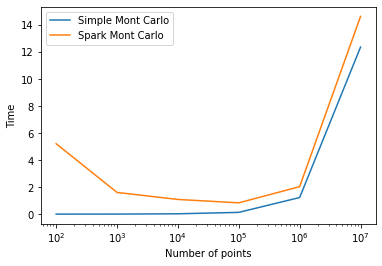

In [11]:
def MC_pi_spark(iteration):
  spark = SparkSession.builder.appName('Pi').getOrCreate()
  sc = spark.sparkContext
  start_time = time.time()
  hit = sc.parallelize(range(0, iteration), 2) \
      .map(is_inside).reduce(add)
  pi = 4.0 * hit / iteration
  t = time.time() - start_time
  spark.stop()
  return pi, t

iteration_num = [100, 1000, 10000, 100000, 1000000, 10000000]

time_simple_MC = []
time_spark_MC = []

for i in iteration_num:
    
    print('--------Mont Carlo Pi Estimator Without PySparl--------')
    pi_l, t, res = MC_pi_estimator(i)
    print(f'Number of Itration: {i}')
    print(f'Pi = : {res}')
    print(f'Time of computation: {t} seconds')
    time_simple_MC.append(t)
    
    print('--------Mont Carlo Pi Estimator with PySpark--------')   
    res, t = MC_pi_spark(i)
    print(f'Number of Itration: {i}')
    print(f'Pi = : {res}')
    print(f'Time of computation: {t} seconds')
    time_spark_MC.append(t)   
plt.figure(1)
plt.plot(iteration_num, time_simple_MC, label="Simple Mont Carlo")
plt.plot(iteration_num, time_spark_MC, label="Spark Mont Carlo")

plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Time")
plt.legend()
plt.show()

In [1]:
# First Method
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .getOrCreate()

sc = spark.sparkContext

In [13]:
spark.version


'3.2.1'

In [2]:
! wget -q https://raw.githubusercontent.com/SajjadMb/PySpark-walkthrough/main/data/digikala_comments.csv

In [3]:
df = spark.read.option("header", True).option("multiline",True).csv("digikala_comments.csv")
df.show()


+----------+--------------------+--------+-------+-----+--------+-------------------+---------------+--------------------+--------------------+--------------------+--------------------+
|product_id|       product_title|title_en|user_id|likes|dislikes|verification_status|      recommend|               title|             comment|          advantages|       disadvantages|
+----------+--------------------+--------+-------+-----+--------+-------------------+---------------+--------------------+--------------------+--------------------+--------------------+
|      3692|ماوس بی‌سیم لاجیت...|      IT| 989472|    0|       0|           verified|             \N|                null|واقعا عالیه. من ک...|                null|                null|
|     90213|شارژر همراه شیاوم...|      AC|3862150|    4|       1|           verified|    recommended|        واقعاً عالیه|سلام، قبل اینکه ن...|  "[""عمر طولانی\r""|""افت بسیار کم می...|
|     59473|یدک پولیشر میکروف...|      HW| 626843|    1|       0|     

In [16]:
!pip install hazm

In [4]:
def convert_num(text):
  persian = ['۰', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹']
  convertedPersianNums = text.replace('۰','0').replace('۱','1').replace('۲','2').replace('۳','3').replace('۴','4')\
  .replace('۵','5').replace('۶','6').replace('۷','7').replace('۸','8').replace('۹','9')
  return convertedPersianNums


In [7]:
stopwords = stopwords_list()+['ها']
def remove_stop_words(text):
  text = re.sub('[^آ-ی]', ' ', text)
  tokenized_text = word_tokenize(text)
  print(tokenized_text)
  all_tokens = [t for t in tokenized_text if t not in stopwords]
  print(all_tokens)
  text = " ".join(all_tokens)
  return text

In [19]:
x = remove_stop_words('من از شهر به روستا رفتم و در راه علی را دیدم')
print(x)

['من', 'از', 'شهر', 'به', 'روستا', 'رفتم', 'و', 'در', 'راه', 'علی', 'را', 'دیدم']
['شهر', 'روستا', 'رفتم', 'علی', 'دیدم']
شهر روستا رفتم علی دیدم


In [58]:
#https://github.com/optimopium/PySpark-walkthrough/blob/main/Spark_Tutorial.ipynb
def clean_normalized(text):
  normalizer = Normalizer()
  try:
    #normalize
    cleaned_text = text.replace('_x000D_\n',' ').splitlines() 
    cleaned_text = ' '.join(cleaned_text)
    cleaned_text = normalizer.normalize(cleaned_text)
    cleaned_text = cleaned_text.replace("،"," ").replace("\u200c"," ").replace(r"\u200"," ").replace(r"\u200b"," ")\
            .replace("."," ").replace("-"," ").replace("_"," ").replace("\n"," ").replace("\r"," ").replace("\\"," ")\
            .replace("("," ").replace(")"," ").replace("["," ").replace("!"," ").replace("]"," ")\
            .replace("r"," ").replace("\""," ")
    cleaned_text = re.sub(r"\s+.\u0648.\s+", ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)

    #Remove numbers
    #cleaned_text = cleaned_text.replace('x000D',' ').splitlines() 
    #cleaned_text = ' '.join(cleaned_text)
    cleaned_text = convert_num(cleaned_text)
    cleaned_text = re.sub(r'[0-9]', ' ', cleaned_text)
    cleaned_text = re.sub(' +', ' ',cleaned_text)
    return cleaned_text
  except:
    return None

In [59]:
clean_comment = udf(lambda z: clean_normalized(z))
stop_words_deletion = udf(lambda z: remove_stop_words(z))

In [60]:
df.select('product_id', 'comment').show(truncate=False)
df_res = df.select(col("product_id"),clean_comment(col("comment")).alias("comment") ) 


+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
df_res.show(truncate=False)

+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

pyspark.sql.dataframe.DataFrame

In [62]:
df_word_count = df_res.withColumn('wordCount', F.size(F.split(F.col('comment'), ' ')))
df_word_count.select('product_id','wordCount').show(100)

+----------+---------+
|product_id|wordCount|
+----------+---------+
|      3692|        7|
|     90213|      182|
|     59473|       60|
|    120499|      247|
|     67200|       64|
|    133722|      238|
|    148509|       38|
|     56871|       14|
|     49738|       43|
|    161548|        2|
|      5107|       89|
|    156041|       19|
|    134367|       72|
|    114006|       26|
|    151402|       80|
|    146879|       19|
|     81254|       14|
|     26368|       12|
|     90894|       55|
|     21340|       11|
|    144139|       87|
|    138040|       56|
|    105719|       42|
|    147165|       42|
|    116387|       38|
|     73064|       65|
|    110040|       90|
|    139131|       52|
|     80854|        6|
|    163519|       10|
|    102068|      431|
|    129988|       34|
|    130386|      103|
|    160008|       31|
|     93850|      126|
|    154624|       75|
|    106471|        7|
|    112714|       55|
|    104427|       74|
|    133709|       65|
|     55495

In [64]:
df_res = df_res.dropna()

df_res = df_res.na.drop("all")
df_res.withColumn('word', F.explode(F.split(F.col('comment'), ' ')))\
    .groupBy('word')\
    .count()\
    .sort('count', ascending=False)\
    .show()


+-------+-----+
|   word|count|
+-------+-----+
|      و|12014|
|     که| 6134|
|     از| 5902|
|     به| 5070|
|    این| 4886|
|     من| 3790|
|     با| 3655|
|     رو| 3544|
|   خیلی| 3485|
|     هم| 3266|
|     در| 3157|
|   داره| 2230|
|       | 2220|
|   برای| 1991|
|    ولی| 1990|
|استفاده| 1782|
|    هست| 1725|
|  کیفیت| 1593|
|   میشه| 1389|
|    های| 1386|
+-------+-----+
only showing top 20 rows



In [67]:
df_final = df_res.select(col("product_id"),stop_words_deletion(col("comment")).alias("comment") ) 
#df_final.show(truncate=False)

In [69]:
df_final.withColumn('word', F.explode(F.split(F.col('comment'), ' ')))\
    .groupBy('word')\
    .count()\
    .sort('count', ascending=False)\
    .show(100)

+-------+-----+
|   word|count|
+-------+-----+
|   داره| 2232|
|استفاده| 1783|
|    هست| 1726|
|  کیفیت| 1594|
|   میشه| 1389|
|    های| 1386|
|  خریدم| 1300|
|     یه| 1205|
|   گوشی| 1174|
|   خوبه| 1140|
|  عالیه| 1140|
|  واقعا| 1076|
|   اصلا|  981|
|  میکنم|  933|
|  نداره|  884|
|   قیمت|  884|
|  میکنه|  883|
|   خرید|  858|
|    کار|  837|
|   دیجی|  808|
|   راضی|  801|
|   شارژ|  792|
|پیشنهاد|  769|
|   کالا|  707|
|     ای|  663|
|   باشه|  642|
|   دیگه|  635|
|  محصول|  629|
|   سلام|  615|
|    ازش|  570|
|  قیمتش|  565|
|    اگه|  548|
| دستگاه|  492|
|  گرفتم|  491|
|   دارم|  489|
|   ساعت|  464|
|   حتما|  464|
| دوستان|  455|
|    ماه|  454|
|    مدل|  453|
|    رنگ|  444|
|   الان|  440|
|  راضیم|  428|
|   ارزش|  413|
|    جنس|  408|
|  نمیشه|  381|
|   میده|  381|
|   بازی|  378|
|    کنه|  374|
|      ی|  370|
|   هستش|  367|
|    سال|  366|
|   هستم|  352|
|    دست|  346|
|   مشکل|  330|
|  خوبیه|  323|
|  بخرید|  323|
|   دستم|  322|
|     تر|  317|
|   راحت

In [ ]:
StopWord

In [ ]:

import re
org_string = "سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان قبل از خرید کلی تحقیق در مورد این لپ تاپ عالی انجام دادم و به این نتیجه رسیدم که از مدل های مشابه همین شرکت و شرکت های دیگه واقعا بهتره،، در طول تحقیق هم به اون ویدیو هایی که بعضی دوستامون اشاره کردن هم برخوردم که از براق بودن صفحه نمایش و لق بودن لولاهای لپ تاپ موقع استفاده از تاچ اسکرین ایراد گرفته بودن، منم خیلی ترسیدم از این بابت ولی وقتی که تصمیم گرفتم که انتخابم رو نهایی کنم و بدستم رسید لپ تاپ دیدم واقعا تمام اون گفته ها اقراری بیش نبوده و اصلا خبری از لق زدن صفحه نیست موقع تاچ مگر اینکه بخوای محکم بکوبی انگشتتو که اونوقت تو هر لپ تاپی مسئله لق زدن هست، ولی از این بابت هیچ مشکلی نیست و کاملا محکم "
pattern = r'[0-9]'
print(clean_normalized(org_string))
#mod_string = re.sub(pattern, '', org_string)
#mod_string = re.sub(r'[^\w\s]', '', org_string)

#print(mod_string)

In [ ]:
comment_likes_dislikes = digikala.select("likes","dislikes","comment")
comment_likes_dislikes.show(30)

In [ ]:
likeablity = comment_likes_dislikes.dropna().withColumn("likability",comment_likes_dislikes["likes"] - comment_likes_dislikes["dislikes"])
likeablity.show()


In [ ]:
popular = likeablity.agg(F.max("likability").alias("best")).collect()
popular

In [ ]:

normalizer = Normalizer()
def normalize(text):
  return nor
s = 'سلام درخت ها را اب بده این نیز می رود'
print (s)
print(normalize(s))

### Q4

In [ ]:

pdf = pd.read_csv("https://raw.githubusercontent.com/SajjadMb/PySpark-walkthrough/main/data/digikala_comments.csv")
selected = pdf.comment
df = pd.DataFrame(selected)

df

In [ ]:
from pyspark.sql.types import *
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)


# Auxiliar functions
def equivalent_type(f):
    if f == 'datetime64[ns]': return TimestampType()
    elif f == 'int64': return LongType()
    elif f == 'int32': return IntegerType()
    elif f == 'float64': return FloatType()
    else: return StringType()

def define_structure(string, format_type):
    try: typo = equivalent_type(format_type)
    except: typo = StringType()
    return StructField(string, typo)

# Given pandas dataframe, it will return a spark's dataframe.
def pandas_to_spark(pandas_df):
    columns = list(pandas_df.columns)
    types = list(pandas_df.dtypes)
    struct_list = []
    for column, typo in zip(columns, types): 
      struct_list.append(define_structure(column, typo))
    p_schema = StructType(struct_list)
    return sqlContext.createDataFrame(pandas_df, p_schema)

In [ ]:
res=pandas_to_spark(pdf)

In [ ]:
res.show()



In [ ]:
res.printSchema

In [ ]:
comment = pandas_to_spark(df)
comment.show()
print(comment.collect()[1])

In [ ]:
from hazm import *
from pyspark.sql.functions import udf
from pyspark.sql.functions import col

normalizer = Normalizer()
def normalize(text):
  normalized = normalizer.normalize(text)
  return normalized
s = ' اگر هر کابل دیگه ای وصل کنیدی'
a = normalize(s)
print(s)
print(a)

convertUDF = udf(lambda z: normalize(z)) 

normal_res = res.select(col("product_id"), \
    convertUDF(col("comment")).alias("comment") ) \
   .show(truncate=False)


In [ ]:
print(normal_res.collect()[5])
print(comment.collect()[5])